In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read depression data
depression_data = pd.read_csv("adult19.csv")
depression_data.head()
#pd.set_option('display.max_rows', 10)

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,...,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_QRT,RECTYPE,WTFA_A,WTIA_A,HHX,POVRATTC_A
0,4,9,3,0,60000,2,2,122,3,2,...,NaN,NaN,1,1,1,10,13177.008,7601.336,H048109,2.96
1,4,9,3,0,50000,0,2,122,2,1,...,NaN,NaN,1,1,1,10,6140.552,3344.434,H027044,2.97
2,4,12,3,0,65000,1,2,122,2,1,...,NaN,NaN,1,1,1,10,9191.061,6949.498,H058855,4.28
3,4,14,5,0,120000,0,2,122,1,8,...,NaN,NaN,1,1,1,10,7900.035,6446.327,H031993,7.13
4,1,4,1,0,30000,0,2,115,2,1,...,NaN,NaN,1,1,1,10,10875.772,8646.586,H007122,1.13


In [3]:
len(depression_data.index)

31997

2019 NHIS data 31997 x 534 cells

In [4]:
# Find all columns that have complete data
full_columns = []
total_full_columns = 0
for (columnName, columnData) in depression_data.iteritems(): # iterate through column names
    #print(depression_data)
    print(columnName + ": " + str(depression_data[columnName].isnull().sum()))
    if depression_data[columnName].isnull().sum() == 0: #if no NaN present in column
        total_full_columns += 1
        full_columns.append(columnName)

full_columns.remove('SRVY_YR')
full_columns.remove('HHSTAT_A')
full_columns.remove('RECTYPE')
full_columns.remove('HHX')
full_columns.remove('INCINTER_A')
total_full_columns = total_full_columns - 5

print("Total full columns: " + str(total_full_columns))
print(full_columns)
# the bottom shows the names of the 163 full columns that will be used for analysis

URBRRL: 0
RATCAT_A: 0
INCGRP_A: 0
INCTCFLG_A: 0
FAMINCTC_A: 0
IMPINCFLG_A: 0
PPSU: 0
PSTRAT: 0
HISPALLP_A: 0
RACEALLP_A: 0
DISAB3_A: 0
SCHDYMSSTC_A: 29952
AFNOW: 7694
PHQCAT_A: 0
YRSINUS_A: 27134
CITZNSTP_A: 0
LEGMSTAT_A: 0
MARSTAT_A: 0
SASPPRACE_A: 16193
SASPPHISP_A: 16193
PRTNREDUC_A: 29972
SPOUSEDUC_A: 18222
PRTNRAGETC_A: 29969
SPOUSAGETC_A: 18221
PRTNRWKFT_A: 30476
PRTNRWRK_A: 29969
SPOUSWKFT_A: 23218
SPOUSWRK_A: 18221
SPOUSESEX_A: 18221
PRTNRSEX_A: 29969
SHTHPVAGEP_A: 29058
SHINGRXYRP_A: 30542
ZOSTAVXYRP_A: 28357
HHRESPSA_FLG: 9753
GADCAT_A: 0
PCNTADTWFP_A: 0
PCNTADTWKP_A: 0
FDSCAT4_A: 0
FDSCAT3_A: 0
EMPDYSMSS2_A: 11598
EMPLSTWORK_A: 19423
EMPWRKFT_A: 13191
EMPWRKLSWK_A: 0
EMPWKHRS2_A: 13212
DIFYRSTC_A: 28642
DIBAGETC_A: 28642
SMKECIGST_A: 0
SMKCIGST_A: 0
BMICAT_A: 0
WEIGHTLBTC_A: 0
HEIGHTTC_A: 0
URGNT12MTC_A: 0
EMERG12MTC_A: 0
PSA5YRTC_A: 26993
PCNTTC: 0
PCNT18UPTC: 0
PCNTLT18TC: 0
COVER65_A: 22675
COVER_A: 9322
EXCHANGE_A: 11518
NOTCOV_A: 0
MILSPC1R_A: 29899
OGFLG_A: 31997
OPFLG

In [5]:
# plot the number of questions each person responded to
# depression_data.hist()
# which questions are binary/nonbinary

In [6]:
# dataset with only full columns
depev = depression_data.loc[:,full_columns]
depev.head()
depev.to_csv("depev.csv")

In [7]:
# ax = depev.hist(columns='URBRRL', 'RATCAT_A', 'INCGRP_A', 'INCTCFLG_A', 'FAMINCTC_A', 'IMPINCFLG_A', 'PPSU', 'PSTRAT', 'HISPALLP_A', 'RACEALLP_A', 'DISAB3_A', 'PHQCAT_A', 'CITZNSTP_A', 'LEGMSTAT_A', 'MARSTAT_A', 'GADCAT_A', 'PCNTADTWFP_A', 'PCNTADTWKP_A', 'FDSCAT4_A', 'FDSCAT3_A', 'EMPWRKLSWK_A', 'SMKECIGST_A', 'SMKCIGST_A', 'BMICAT_A', 'WEIGHTLBTC_A', 'HEIGHTTC_A', 'URGNT12MTC_A', 'EMERG12MTC_A', 'PCNTTC', 'PCNT18UPTC', 'PCNTLT18TC', 'NOTCOV_A', 'OTHGOV_A', 'OTHPUB_A', 'IHS_A', 'MILITARY_A', 'CHIP_A', 'MEDICAID_A', 'MEDICARE_A', 'PRIVATE_A', 'EDUC_A', 'PARSTAT_A', 'SAPARENTSC_A', 'MLTFAMFLG_A', 'OVER65FLG_A', 'PCNTFAM_A', 'PCNTADLT_A', 'PCNTKIDS_A', 'NUMCAN_A', 'HISDETP_A', 'HISP_A', 'REGION', 'SRVY_YR', 'SEX_A', 'AGEP_A', 'ASTATNEW', 'HOUTENURE_A', 'HOUYRSLIV_A', 'FDSBALANCE_A', 'FDSLAST_A', 'FDSRUNOUT_A', 'FSNAP12M_A', 'INCINTER_A', 'INCWRKO_A', 'SCHCURENR_A', 'NATUSBORN_A', 'AFVET_A', 'MARITAL_A', 'ORIENT_A', 'SMOKELSEV_A', 'PIPEEV_A', 'CIGAREV_A', 'ECIGEV_A', 'SMKEV_A', 'GAD77_A', 'GAD76_A', 'GAD75_A', 'GAD74_A', 'GAD73_A', 'GAD72_A', 'GAD71_A', 'PHQ88_A', 'PHQ87_A', 'PHQ86_A', 'PHQ85_A', 'PHQ84_A', 'PHQ83_A', 'PHQ82_A', 'PHQ81_A', 'MHTHND_A', 'MHTHDLY_A', 'MHTHRPY_A', 'DEPMED_A', 'DEPFREQ_A', 'ANXMED_A', 'ANXFREQ_A', 'HOMEHC12M_A', 'THERA12M_A', 'EYEEX12M_A', 'SHTPNUEV_A', 'SHTFLU12M_A', 'DIABLAST_A', 'CHOLLAST_A', 'BPLAST_A', 'RXDG12M_A', 'RX12M_A', 'MEDNG12M_A', 'MEDDL12M_A', 'HOSPONGT_A', 'USUALPL_A', 'LASTDR_A', 'DENNG12M_A', 'DENDL12M_A', 'DENPREV_A', 'PAYWORRY_A', 'PAYBLL12M_A', 'SINCOVRX_A', 'SINCOVVS_A', 'SINCOVDE_A', 'HIKIND10_A', 'HIKIND09_A', 'HIKIND08_A', 'HIKIND07_A', 'HIKIND06_A', 'HIKIND05_A', 'HIKIND04_A', 'HIKIND03_A', 'HIKIND02_A', 'HIKIND01_A', 'HICOV_A', 'SOCWRKLIM_A', 'SOCSCLPAR_A', 'SOCERRNDS_A', 'UPPOBJCT_A', 'UPPRAISE_A', 'UPPSLFCR_A', 'COGMEMDFF_A', 'COMDIFF_A', 'EQUIP_A', 'DIFF_A', 'HEARINGDF_A', 'HEARAID_A', 'VISIONDF_A', 'WEARGLSS_A', 'DEPEV_A', 'ANXEV_A', 'DEMENEV_A', 'ARTHEV_A', 'COPDEV_A', 'DIBEV_A', 'PREDIB_A', 'CANEV_A', 'ASEV_A', 'STREV_A', 'MIEV_A', 'ANGEV_A', 'CHDEV_A', 'CHLEV_A', 'HYPEV_A', 'PHSTAT_A', 'AVAIL_A', 'HHSTAT_A', 'INTV_QRT', 'RECTYPE', 'WTFA_A', 'WTIA_A', 'HHX', 'POVRATTC_A', bins=5, grid=True, figsize=(12,8), 
#                color='#86bf91', rwidth=0.9)

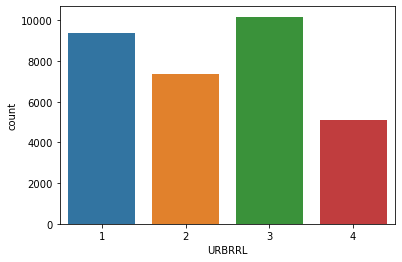

In [8]:
cp = sns.countplot(x="URBRRL", data=depev)

In [9]:
depev["DEPEV_A"]
depev["DEPEV_A"].unique()

array([2, 1, 7, 9])

Find and remove all rows that contain '7': choose not to answer

In [10]:
# list of dont know answer indices
num_dontknow = []
depev_series = depev["DEPEV_A"] == 7

for i in range(31997):
    if depev_series.iloc[i]:
        print(i)
        num_dontknow.append(i)
print(len(num_dontknow))

283
2043
3615
4002
4088
4620
5003
5474
6822
7534
8445
8513
9165
10804
12215
12490
13222
14193
14468
15942
16912
18596
19052
19258
19749
20956
22484
22551
23628
24353
24440
26044
27402
28249
28648
29151
29349
29812
38


In [11]:
depev.drop(labels=num_dontknow,axis=0,inplace=True)

In [12]:
# final dataset, done with preprocessing
depev.to_csv("depev_final.csv")

In [13]:
depev_series = depev["DEPEV_A"] == 7
print(depev_series)

0        False
1        False
2        False
3        False
4        False
         ...  
31992    False
31993    False
31994    False
31995    False
31996    False
Name: DEPEV_A, Length: 31959, dtype: bool


/var/folders/cz/lgl5ccj94j19_mkj6z2zrdsc0000gn/T/ipykernel_64481/1795523409.py:4: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(rect=(0, 0, 32000, 32000))


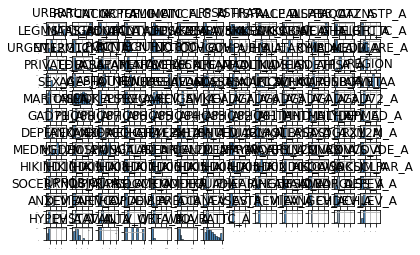

In [14]:
# plot histogram of data
depev.hist(bins=10, color='steelblue', edgecolor='black', linewidth=0.5,
          xlabelsize=1, ylabelsize=1, grid=True)
plt.tight_layout(rect=(0, 0, 32000, 32000))

Here we need to zip the labels and the data together:

In [15]:
depev_final = pd.read_csv("depev_final.csv")
depev_final.drop(depev_final.columns[depev_final.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

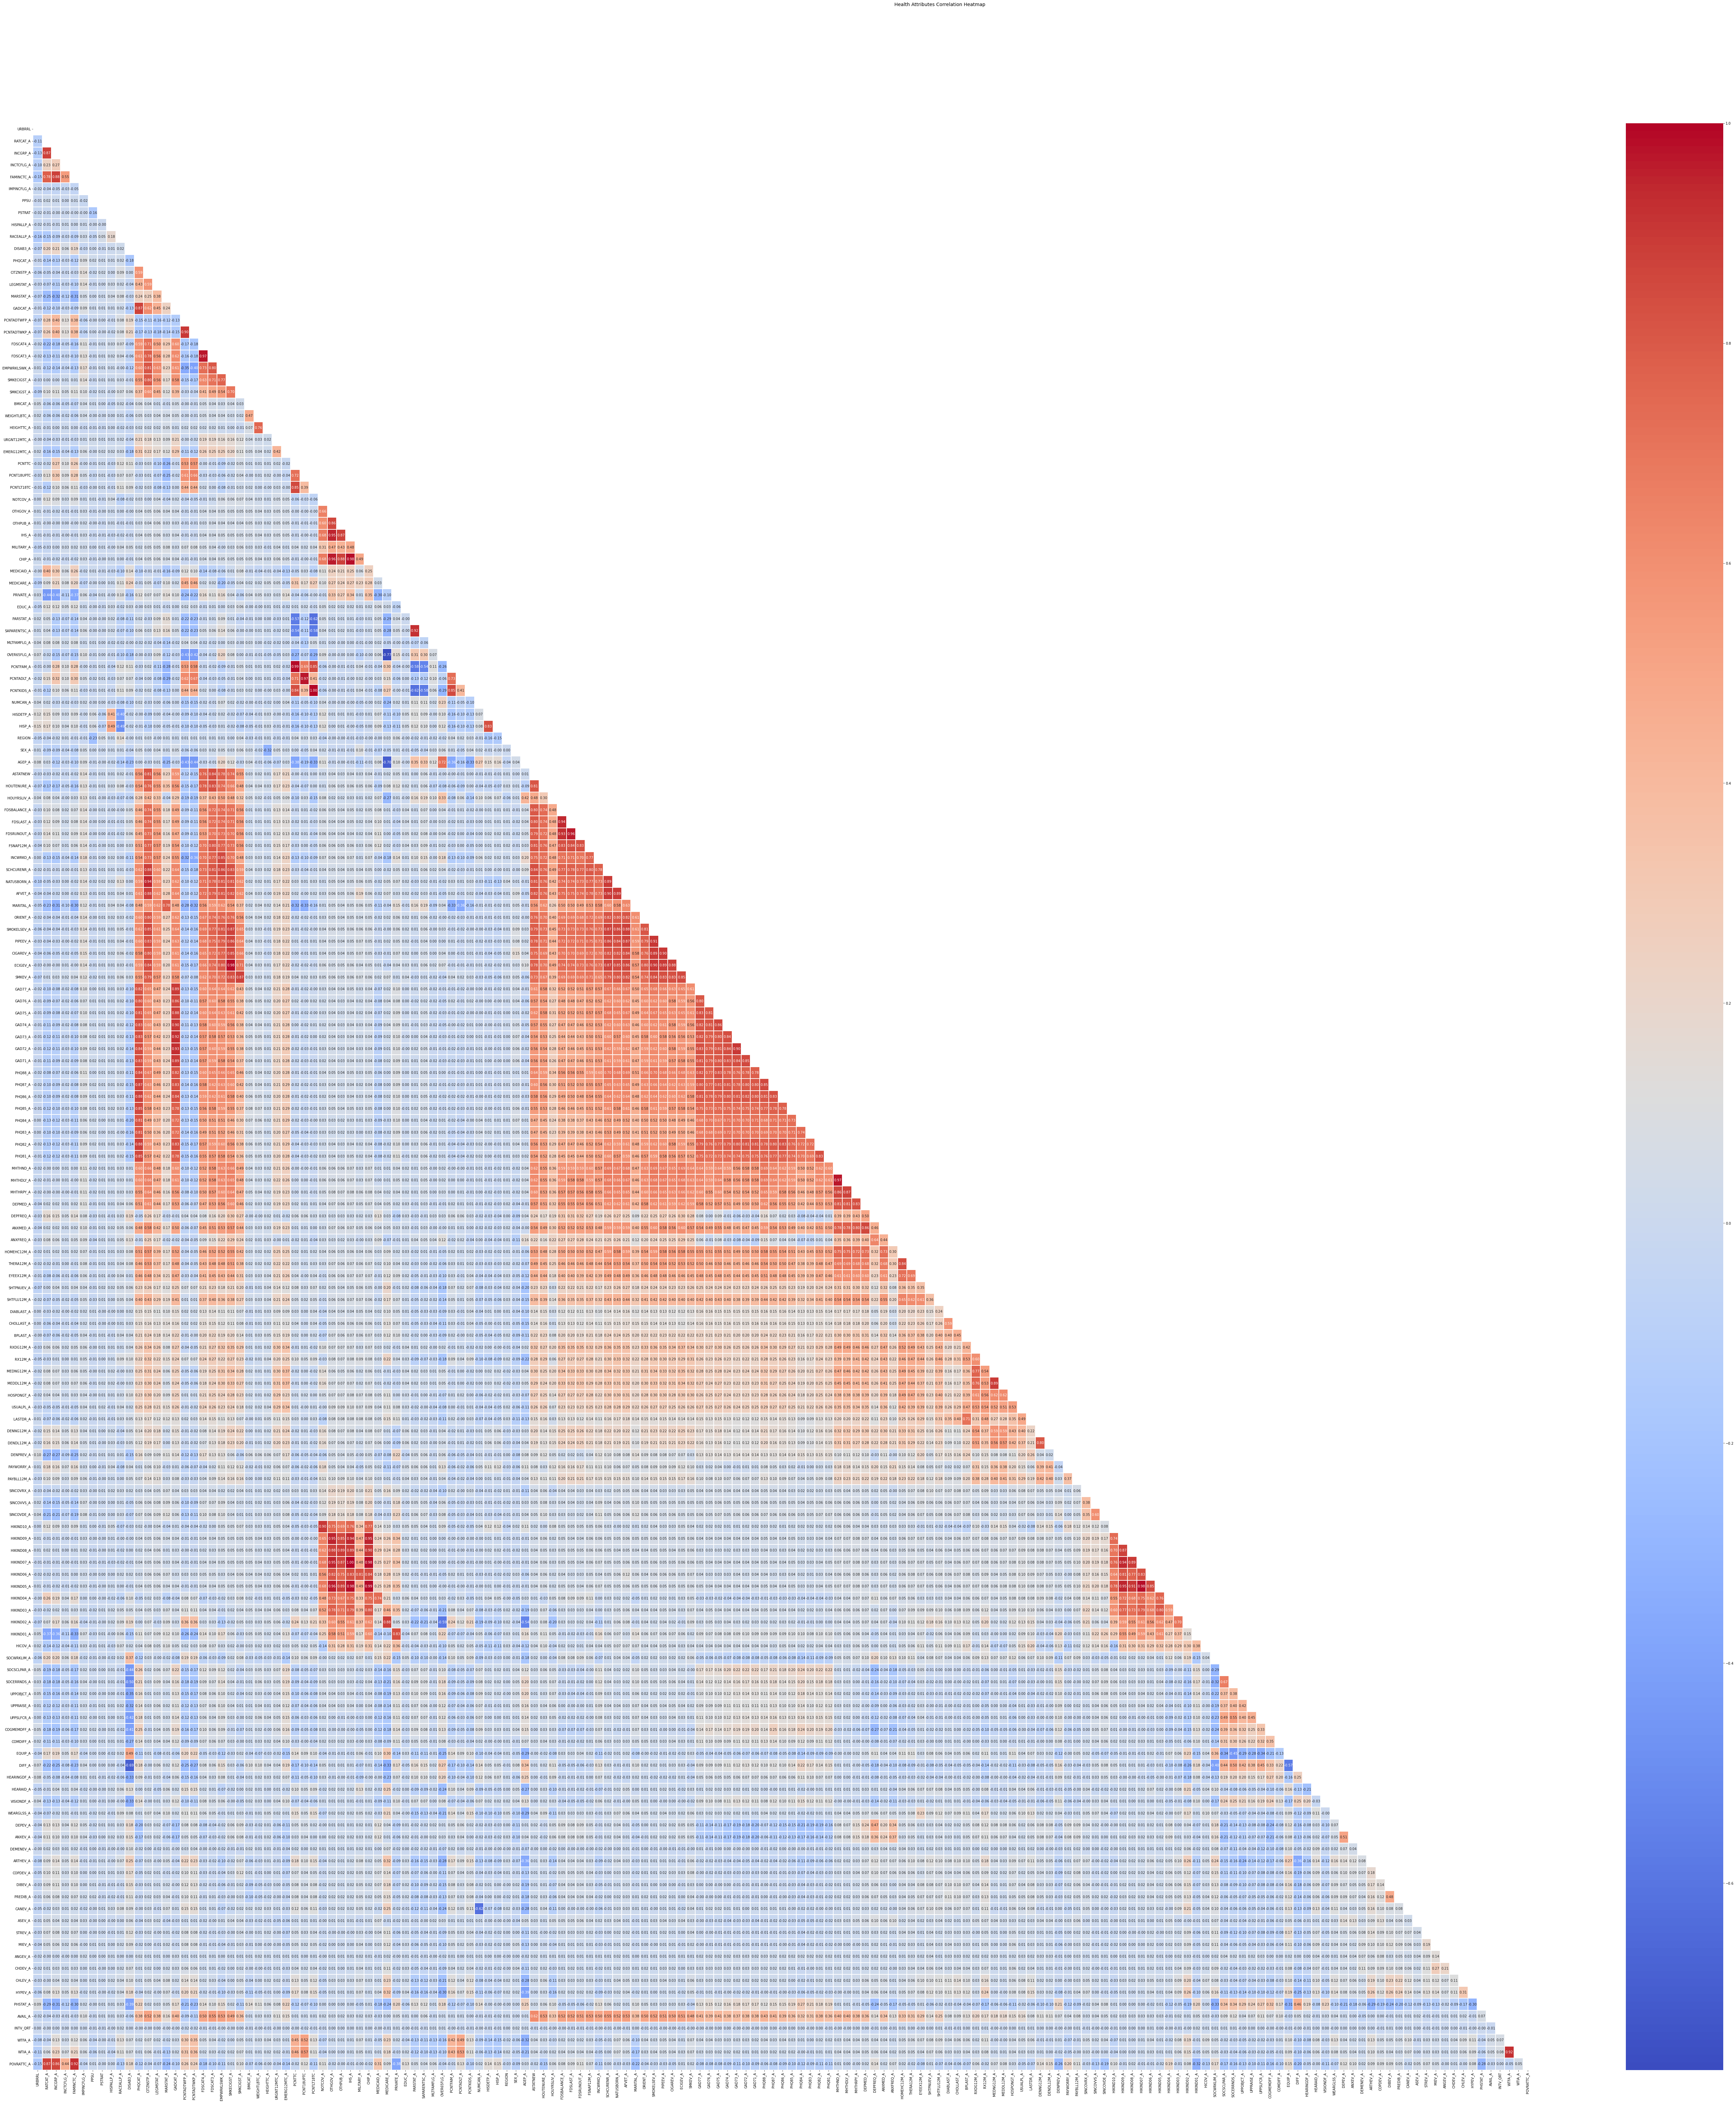

In [16]:
f, ax = plt.subplots(figsize=(100, 100))
corr = depev_final.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
hm = sns.heatmap(round(corr,2), annot=True, mask=mask, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Health Attributes Correlation Heatmap', fontsize=14)

In [17]:
print(corr)

              URBRRL  RATCAT_A  INCGRP_A  INCTCFLG_A  FAMINCTC_A  IMPINCFLG_A  \
URBRRL      1.000000 -0.111819 -0.125024   -0.096153   -0.148547    -0.022414   
RATCAT_A   -0.111819  1.000000  0.871978    0.227444    0.782259    -0.035068   
INCGRP_A   -0.125024  0.871978  1.000000    0.274083    0.883044    -0.052061   
INCTCFLG_A -0.096153  0.227444  0.274083    1.000000    0.547594    -0.028836   
FAMINCTC_A -0.148547  0.782259  0.883044    0.547594    1.000000    -0.046409   
...              ...       ...       ...         ...         ...          ...   
AVAIL_A    -0.019667 -0.037401 -0.027569   -0.009854   -0.026698     0.099171   
INTV_QRT    0.003991 -0.004092  0.000078    0.000277    0.001998     0.002272   
WTFA_A     -0.078777 -0.035784  0.133676    0.026838    0.115147     0.061563   
WTIA_A     -0.114964  0.063121  0.230439    0.072004    0.213887     0.064250   
POVRATTC_A -0.148064  0.872988  0.861627    0.439109    0.916994    -0.039960   

                PPSU    PST

These are the highest correlation pairs in the entire matrix, not including redundant pairs

In [18]:
def get_redundant_pairs(depev_final):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = depev_final.columns
    for i in range(0, depev_final.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(depev_final, n=5):
    au_corr = depev_final.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(depev_final)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Highest Absolute Correlations")
print(get_top_abs_correlations(depev_final, 10))

Highest Absolute Correlations
IHS_A        HIKIND07_A    0.999238
PCNTLT18TC   PCNTKIDS_A    0.998626
CHIP_A       HIKIND05_A    0.994699
PCNTTC       PCNTFAM_A     0.985525
SMKECIGST_A  ECIGEV_A      0.983489
HIKIND07_A   HIKIND05_A    0.980155
IHS_A        HIKIND05_A    0.979415
CHIP_A       HIKIND07_A    0.975741
IHS_A        CHIP_A        0.975003
FDSCAT4_A    FDSCAT3_A     0.967386
dtype: float64


Here we find the highest correlation pairs with the DEPEV_A column:

In [23]:
depev_corr = corr['DEPEV_A']
depev_corr.head()

URBRRL       -0.036662
RATCAT_A      0.130135
INCGRP_A      0.125204
INCTCFLG_A    0.036320
FAMINCTC_A    0.117285
Name: DEPEV_A, dtype: float64

In [28]:
depev_corr.abs().sort_values(ascending=False)

DEPEV_A        1.000000
ANXEV_A        0.508863
DEPFREQ_A      0.472252
ANXFREQ_A      0.342654
COGMEMDFF_A    0.242247
                 ...   
SINCOVDE_A     0.002185
INTV_QRT       0.001978
ORIENT_A       0.000582
HIKIND10_A     0.000490
NOTCOV_A       0.000421
Name: DEPEV_A, Length: 163, dtype: float64